In [1]:
# Librerias necesarias
from CoffeaDelphes import Converter
import numpy as np
import matplotlib.pyplot as plt
from hist import Hist
import mplhep as hep
import pandas as pd
plt.style.use([hep.style.ROOT])

import warnings
warnings.filterwarnings('ignore')

In [2]:
fname = "/cms/mc/Samples/Lowptbjet/Zprime_bbbar_M50.root" # archivo .root de eventos generados con Delphes.
tree = Converter(fname) # Generar el objeto tree
events = {"Jet": ["PT", "Eta", "Phi", "Mass", "BTag"],
          "MissingET": ["MET", "Phi"],
          "Muon": ["PT", "Eta", "Phi", "Charge"],
          "Electron": ["PT", "Eta", "Phi", "Charge"]} # generar un diccionario con los eventos que se desean.
tree.generate(events) # ingresar en
data = tree.df

In [3]:
data.head() # Visualizar los datos obtenidos

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,missinget_met,missinget_phi,muon_pt0,muon_eta0,muon_phi0,muon_charge0,electron_pt0,electron_eta0,electron_phi0,electron_charge0
0,62.016109,46.997913,34.228870,30.865467,-0.607084,-3.023663,-2.919088,1.207050,0.009484,-2.999144,...,16.189470,-0.094437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36.520973,30.758999,29.836596,20.442619,0.409347,1.242087,0.613536,-0.510407,1.015780,2.322117,...,3.657078,1.564066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20.906301,14.655532,6.070272,5.402434,3.086690,3.324408,3.239179,2.796623,0.245975,-2.627605,...,6.746422,3.017491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.523180,15.212760,9.867399,8.487084,-0.722504,-0.741535,0.054573,-0.742068,-1.187535,2.179609,...,14.231677,0.079118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.747971,15.106291,8.664992,8.586075,1.288282,0.154733,3.127723,2.437404,3.006339,-0.438111,...,18.454487,1.671880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns # Se observa las columnas generadas

Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'missinget_met', 'missinget_phi',
       'muon_pt0', 'muon_eta0', 'muon_phi0', 'muon_charge0', 'electron_pt0',
       'electron_eta0', 'electron_phi0', 'electron_charge0'],
      dtype='object')

In [307]:
# formulas para Delta phi, Abs Delta phi y DeltaR
def DeltaPhi(i,row, col1, col2):
    """
    correction on azimuthal angle difference dphi
    """
    dphi = (row[col1] - row[col2])[i]
    if dphi >= np.pi:
        dphi -= 2*np.pi
    if dphi < -np.pi:
        dphi += 2*np.pi
    return dphi

def AbsDeltaPhi(i,rowa, col1a, col2a = 'met_Phi'):
    return np.abs(DeltaPhi(i,rowa, col1a, col2a))

def DeltaR(Deta,Dphi):
    return np.sqrt( Deta**2 + Dphi**2 )

In [6]:
def pt_jet(data,feature,min_range,max_range, bin):
    '''
    Realiza un grafico de cada objeto.
    '''
    
    #fig = plt.figure(figsize=(6,4))
    box_style=dict(boxstyle='square', alpha=0.5)
    text = "n_events: {}".format(data[feature].count())+"\n" \
            +"mean: {}".format(np.round(data[feature].mean(),2))+"\n" \
            +"std: {}".format(np.round(data[feature].std(),2))
    plt.hist(data[feature],bins=bin)
    
    ax = plt.gca()
    p = ax.patches  
    heights = [patch.get_height() for patch in p]
    if feature[:6] == "Delta_": num = 3
    else: num = 1.8
    
    plt.title("Histograma del objeto: {}".format(feature),size=15)
    #plt.xlabel("pT [GeV]",size=10)
    plt.ylabel("Eventos",size=10)
    plt.text(max_range/num,max(heights)/1.3, text,bbox=box_style,size=12)
    plt.xlim(min_range,max_range)

# Graficas de los Pt(j1,j2,j3,j4)

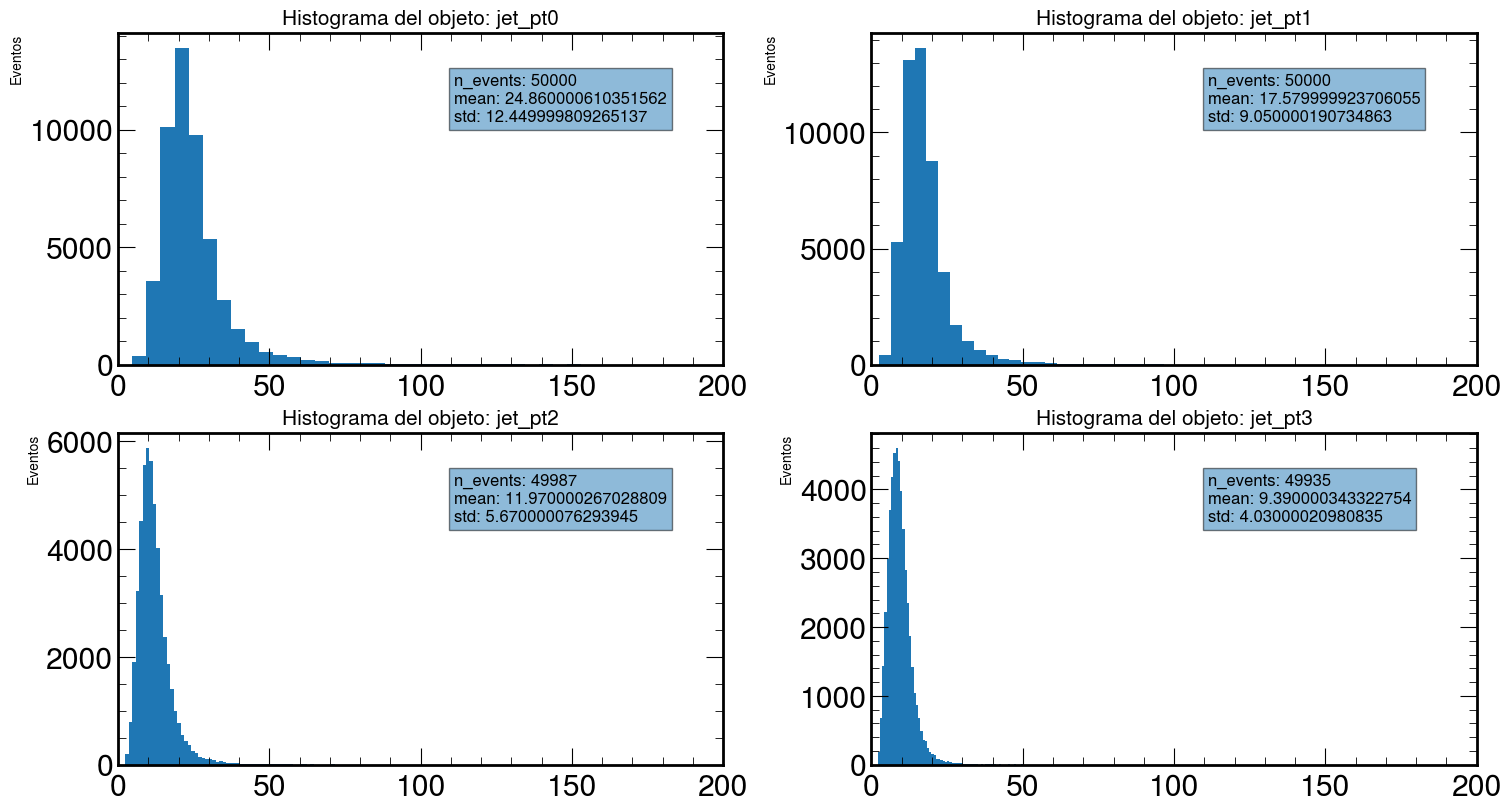

In [7]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(data,"jet_pt0",0,200,100)
plt.subplot(2,2,2)
pt_jet(data,"jet_pt1",0,200,100)
plt.subplot(2,2,3)
pt_jet(data,"jet_pt2",0,200,100)
plt.subplot(2,2,4)
pt_jet(data,"jet_pt3",0,200,100)

# Graficas de los  $\eta$(j1,j2,j3,j4)

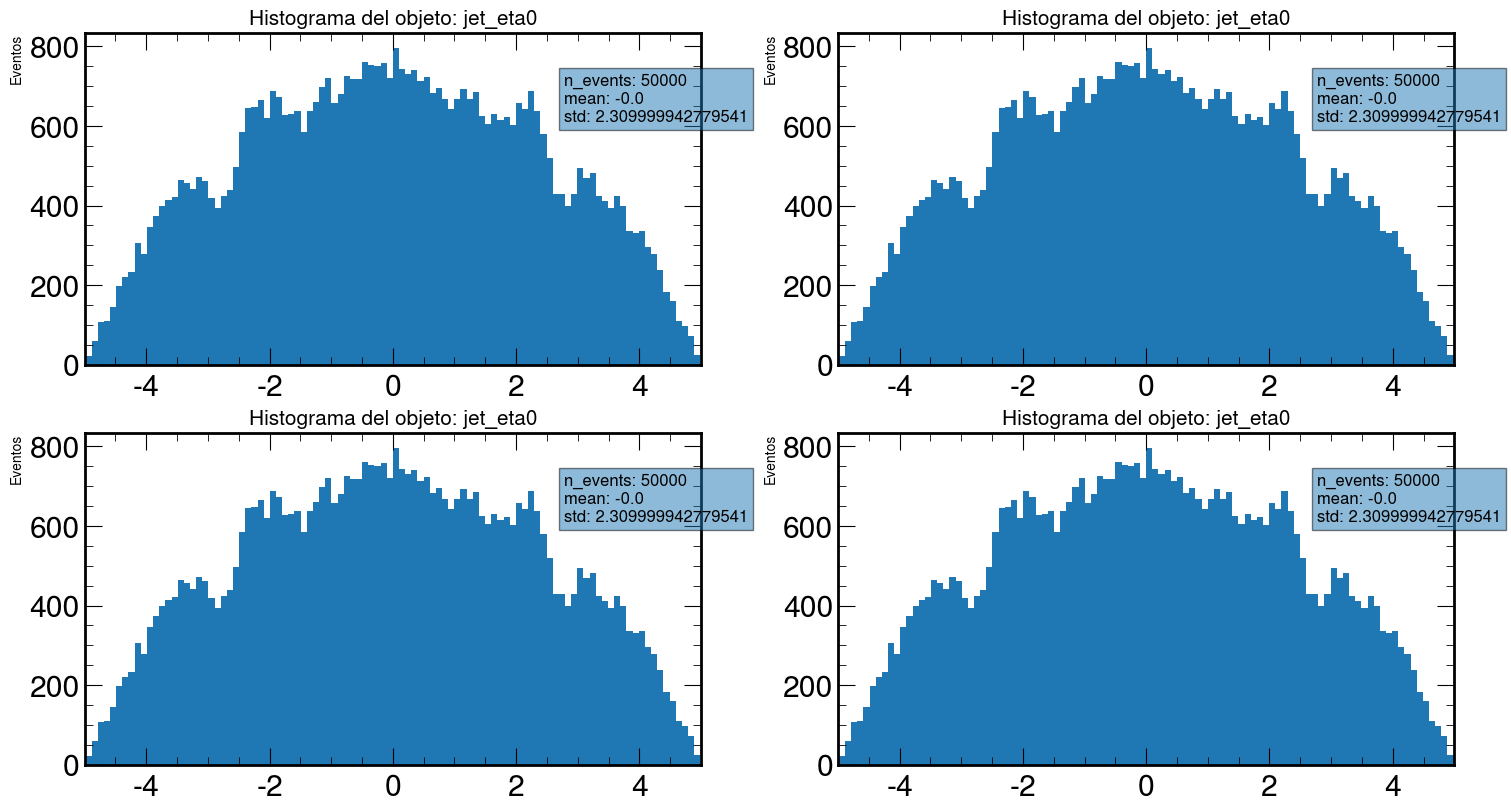

In [8]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(data,'jet_eta0',-5,5,100)
plt.subplot(2,2,2)
pt_jet(data,'jet_eta0',-5,5,100)
plt.subplot(2,2,3)
pt_jet(data,'jet_eta0',-5,5,100)
plt.subplot(2,2,4)
pt_jet(data,'jet_eta0',-5,5,100)

# Graficas de los  $\phi$(j1,j2,j3,j4)

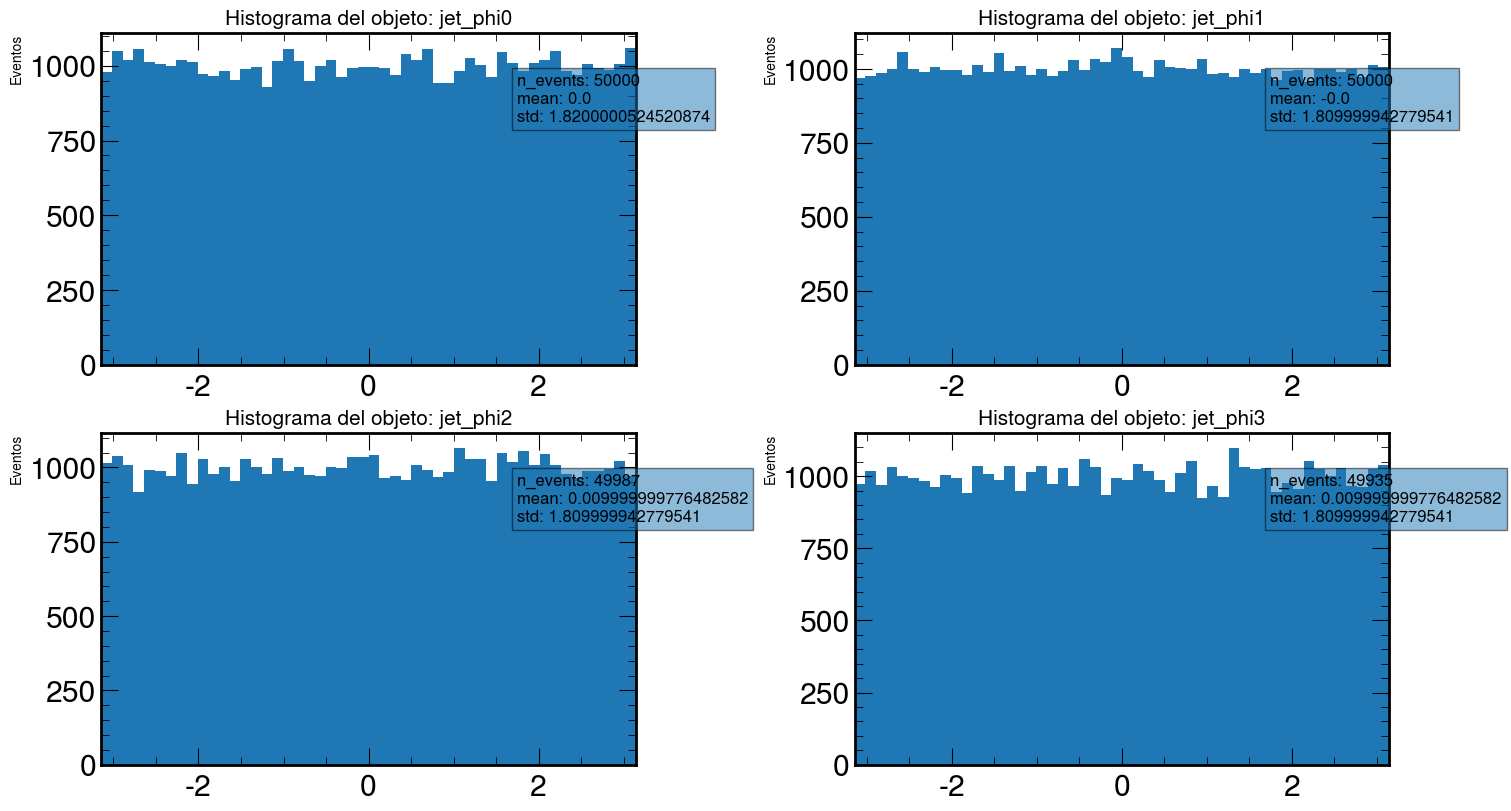

In [9]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(data,'jet_phi0',-np.pi,np.pi,50)
plt.subplot(2,2,2)
pt_jet(data,'jet_phi1',-np.pi,np.pi,50)
plt.subplot(2,2,3)
pt_jet(data,'jet_phi2',-np.pi,np.pi,50)
plt.subplot(2,2,4)
pt_jet(data,'jet_phi3',-np.pi,np.pi,50)

# Análisis para los bjets b1, b2

In [10]:
f = data[["jet_btag0","jet_btag1","jet_btag2","jet_btag3"]]
f_list = [ sum(f.loc[i]) for i in range(len(f)) ]
data.insert(1,"n_jets",f_list)

In [63]:
data_filtered = data[data["n_jets"] == 2]
print("Numero de eventos con 2 jets:",len(data_filtered))
data2 = data_filtered[["n_jets","jet_btag0","jet_btag1","jet_btag2","jet_btag3","jet_pt0","jet_pt1","jet_pt2","jet_pt3","jet_phi0","jet_phi1","jet_phi2","jet_phi3"]]
data2.head()

Numero de eventos con 2 jets: 7529


,n_jets,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_phi0,jet_phi1,jet_phi2,jet_phi3
1,2.0,1.0,1.0,0.0,0.0,36.520973,30.758999,29.836596,20.442619,1.015780,2.322117,-1.991271,-0.625506
13,2.0,1.0,1.0,0.0,0.0,30.415281,14.244907,6.512156,5.555034,-2.900409,-0.205079,0.500581,-1.536333
16,2.0,1.0,0.0,1.0,0.0,38.492733,34.573006,17.479437,16.904634,3.118397,0.560818,-1.915401,-0.167770
20,2.0,0.0,1.0,0.0,1.0,21.018349,19.937721,19.372181,15.938089,-0.883051,-3.104975,-0.536545,1.443351
25,2.0,1.0,0.0,1.0,0.0,29.754230,18.750822,11.970448,10.842950,-2.396115,-0.501223,0.740930,1.311700


In [12]:
tag_pt = []
tag_eta = []
tag_phi = []
tag_mass = []
for i in range(data2.shape[0]):
    pt = []
    eta = []
    phi = []
    mass = []
    if data2.iloc[i][0] == 1.0: 
        pt.append(data_filtered.jet_pt0.to_list()[i])
        eta.append(data_filtered.jet_eta0.to_list()[i])
        phi.append(data_filtered.jet_phi0.to_list()[i])
        mass.append(data_filtered.jet_mass0.to_list()[i])
    if data2.iloc[i][1] == 1.0: 
        pt.append(data_filtered.jet_pt1.to_list()[i])
        eta.append(data_filtered.jet_eta1.to_list()[i])
        phi.append(data_filtered.jet_phi1.to_list()[i])
        mass.append(data_filtered.jet_mass1.to_list()[i])
    if data2.iloc[i][2] == 1.0: 
        pt.append(data_filtered.jet_pt2.to_list()[i])
        eta.append(data_filtered.jet_eta2.to_list()[i])
        phi.append(data_filtered.jet_phi2.to_list()[i])
        mass.append(data_filtered.jet_mass2.to_list()[i])
    if data2.iloc[i][3] == 1.0: 
        pt.append(data_filtered.jet_pt3.to_list()[i])
        eta.append(data_filtered.jet_eta3.to_list()[i])
        phi.append(data_filtered.jet_phi3.to_list()[i])
        mass.append(data_filtered.jet_mass3.to_list()[i])
    tag_pt.append(pt)
    tag_eta.append(eta)
    tag_phi.append(phi)
    tag_mass.append(mass)


jet_pt_b1 = [j[0] for j in tag_pt]
jet_pt_b2 = [j[1] for j in tag_pt]
jet_eta_b1 = [j[0] for j in tag_eta]
jet_eta_b2 = [j[1] for j in tag_eta]
jet_phi_b1 = [j[0] for j in tag_phi]
jet_phi_b2 = [j[1] for j in tag_phi]
jet_mass_b1 = [j[0] for j in tag_mass]
jet_mass_b2 = [j[1] for j in tag_mass]


di = {"jet_pt_b1":jet_pt_b1,"jet_pt_b2":jet_pt_b2,
      "jet_eta_b1":jet_eta_b1,"jet_eta_b2":jet_eta_b2,
      "jet_phi_b1":jet_phi_b1,"jet_phi_b2":jet_phi_b2,
      "jet_mass_b1":jet_mass_b1,"jet_mass_b2":jet_mass_b2}

data_bjet = pd.DataFrame(di)
data_bjet.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2
0,36.520973,30.758999,0.409347,1.242087,1.015780,2.322117,3.420154,4.004740
1,30.415281,14.244907,-0.723814,-1.353978,-2.900409,-0.205079,6.192515,3.142711
2,38.492733,17.479437,1.769234,2.213748,3.118397,-1.915401,5.367582,3.574377
3,19.937721,15.938089,-0.101928,0.890768,-3.104975,1.443351,3.958317,1.914171
4,29.754230,11.970448,-0.044334,-1.366111,-2.396115,0.740930,5.236414,2.407120


In [13]:
phi_cor = []
for i in range(len(data_bjet)):
    phi_cor.append(AbsDeltaPhi(i,data_bjet,"jet_phi_b1","jet_phi_b2"))

data_bjet['Delta_eta_b'] = data_bjet.jet_eta_b2 - data_bjet.jet_eta_b1
data_bjet['Delta_phi_b'] = phi_cor
data_bjet["DeltaR_b"] = DeltaR(data_bjet.Delta_eta_b,data_bjet.Delta_phi_b)
data_bjet.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,DeltaR_b
0,36.520973,30.758999,0.409347,1.242087,1.015780,2.322117,3.420154,4.004740,0.832740,1.306336,1.549184
1,30.415281,14.244907,-0.723814,-1.353978,-2.900409,-0.205079,6.192515,3.142711,-0.630164,2.695330,2.768016
2,38.492733,17.479437,1.769234,2.213748,3.118397,-1.915401,5.367582,3.574377,0.444513,1.249388,1.326108
3,19.937721,15.938089,-0.101928,0.890768,-3.104975,1.443351,3.958317,1.914171,0.992696,1.734860,1.998796
4,29.754230,11.970448,-0.044334,-1.366111,-2.396115,0.740930,5.236414,2.407120,-1.321776,3.137044,3.404136


# Graficas de los $P_{T}$(b1,b2)

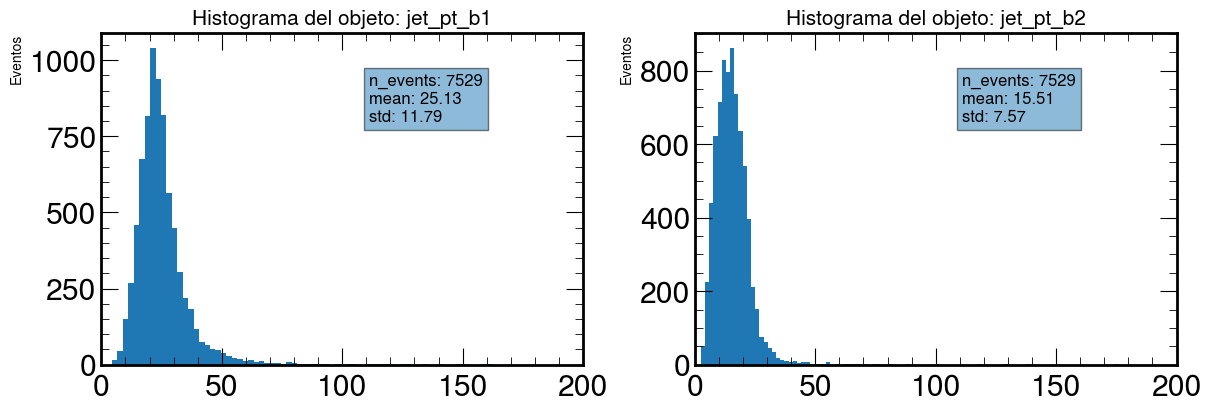

In [14]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,"jet_pt_b1",0,200,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,"jet_pt_b2",0,200,100)

# Graficas de los $\eta$(b1), $\eta$(b2)

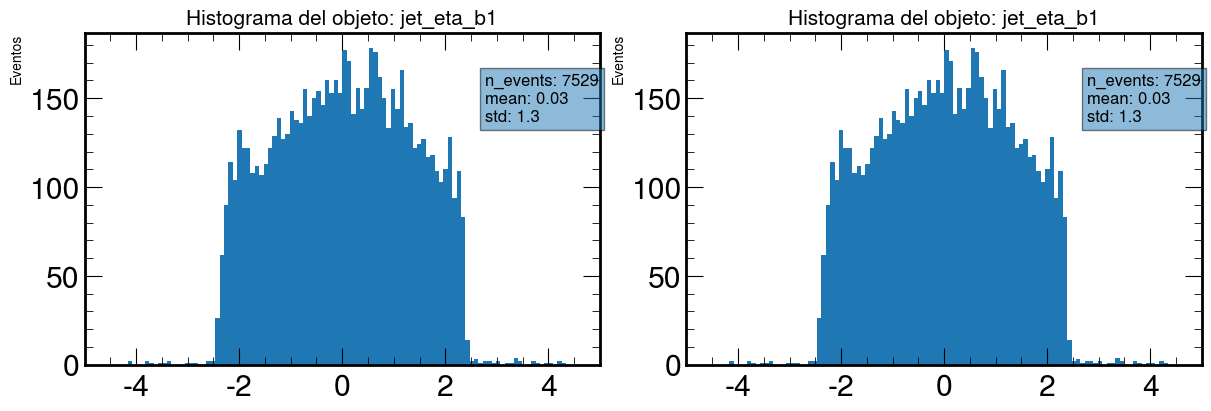

In [15]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'jet_eta_b1',-5,5,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'jet_eta_b1',-5,5,100)

# Graficas de los $\phi$(b1), $\phi$(b2)

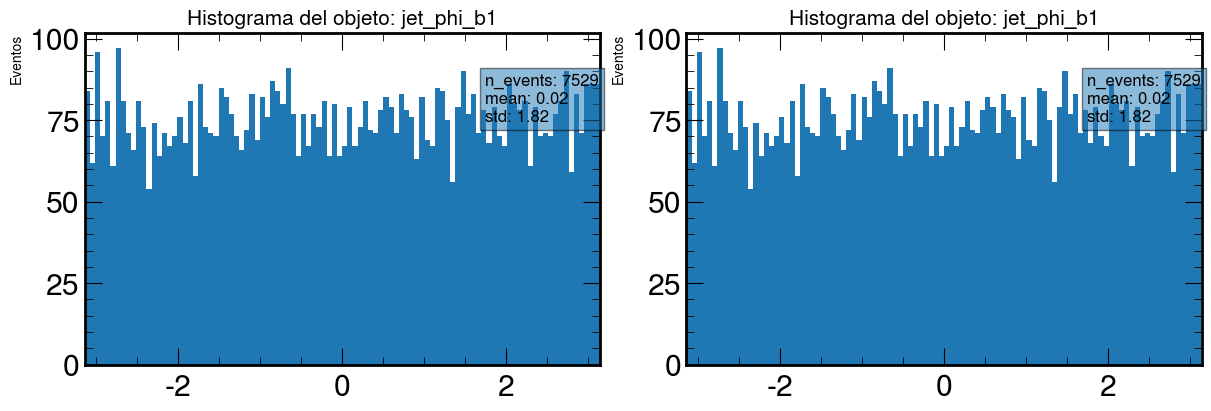

In [16]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'jet_phi_b1',-np.pi,np.pi,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'jet_phi_b1',-np.pi,np.pi,100)

# Graficas de los $\Delta \phi$, $\Delta \eta$  y $\Delta R$

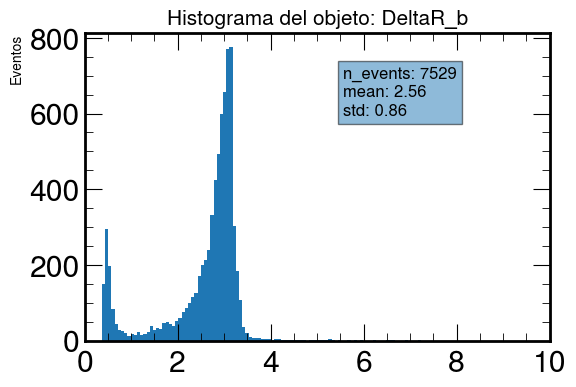

In [17]:
plt.figure(figsize=(6,4))
pt_jet(data_bjet,"DeltaR_b",0,10,100)

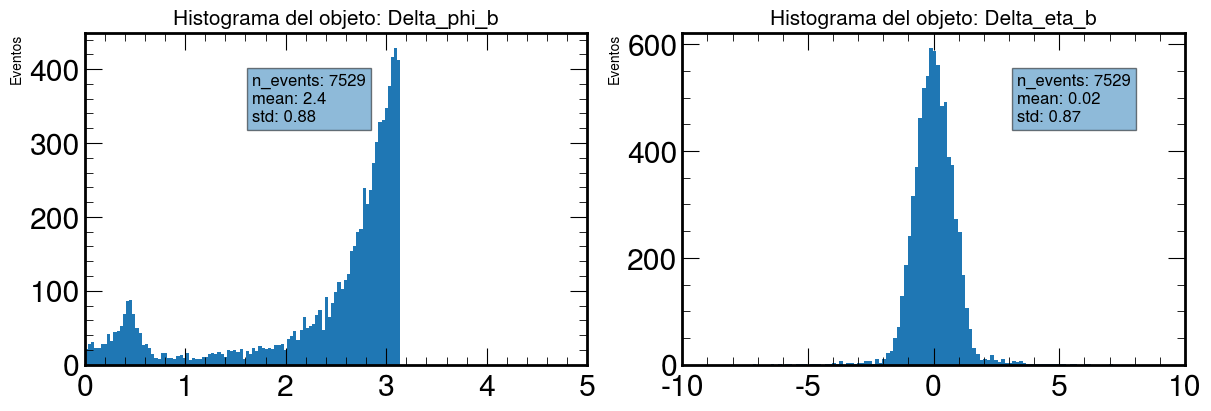

In [18]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'Delta_phi_b',0,5,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'Delta_eta_b',-10,10,100)

# Masa invariante en Colisionadores de particulas:

In [19]:
def y(m,eta,pt):
    return np.log( (np.sqrt(m**2 + (pt**2)*(np.cosh(eta)**2)) + pt*np.sinh(eta)) / (np.sqrt(m**2 + pt**2)) )

y1 = y(data_bjet.jet_mass_b1,data_bjet.jet_eta_b1,data_bjet.jet_pt_b1)
y2 = y(data_bjet.jet_mass_b2,data_bjet.jet_eta_b2,data_bjet.jet_pt_b2)

data_bjet['y1'] = y1
data_bjet['y2'] = y2

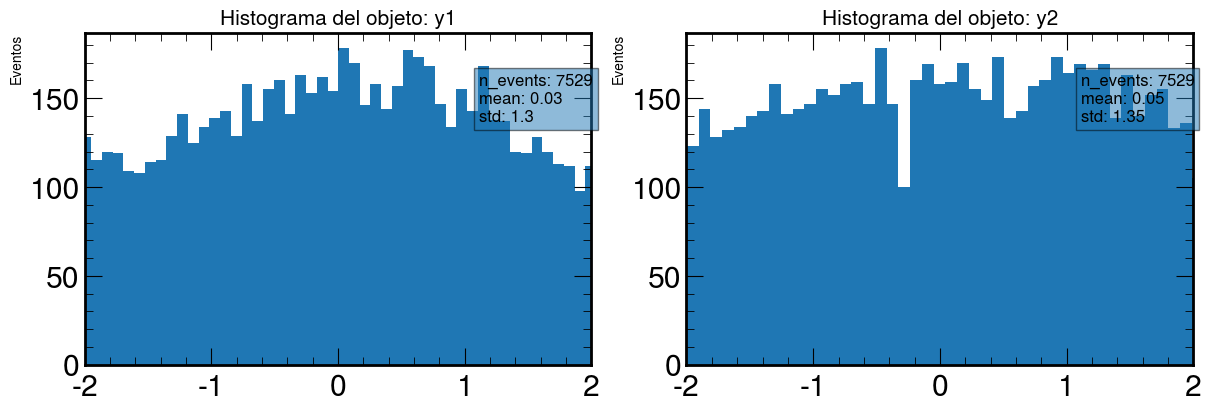

In [20]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'y1',-2,2,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'y2',-2,2,100)

In [21]:
def inv_mass(pt1,pt2,y1,y2,Dphi):
    return np.sqrt(2*pt1*pt2*(np.cosh(y1 - y2) - np.cos(Dphi)))

inv_m = inv_mass(data_bjet.jet_pt_b1,data_bjet.jet_pt_b2,
                 data_bjet.y1,data_bjet.y2,
                 data_bjet.Delta_phi_b)

data_bjet["inv_mass_b"] = inv_m # agregamos al dataset la masa invariante.

def inv_mass(pt1,pt2,Deta,Dphi):
    return np.sqrt(2*pt1*pt2*(np.cosh(Deta) - np.cos(Dphi)))

inv_m = inv_mass(data_bjet.jet_pt_b1,data_bjet.jet_pt_b2,
                 data_bjet.Delta_eta_b,
                 data_bjet.Delta_phi_b)

data_bjet["inv_mass_b_eta"] = inv_m # agregamos al dataset la masa invariante.

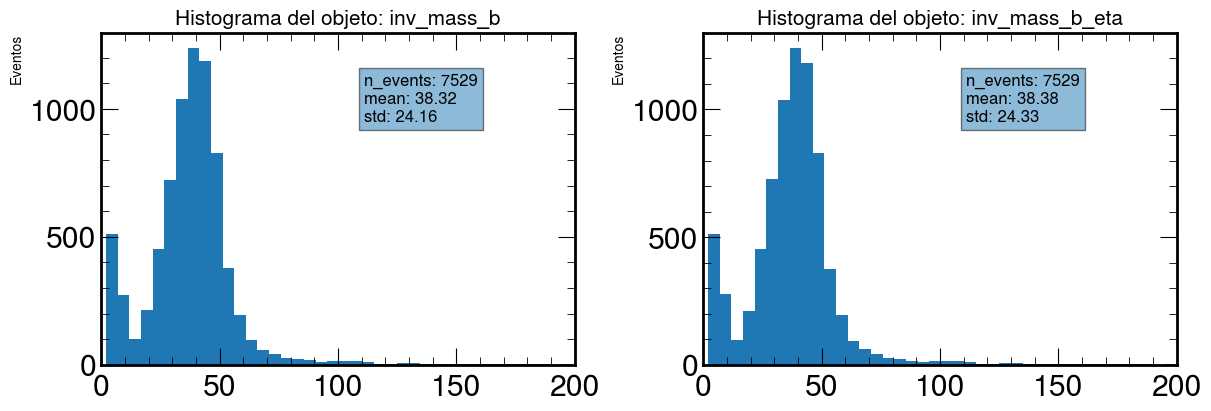

In [22]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,"inv_mass_b",0,200,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,"inv_mass_b_eta",0,200,100)

# MET

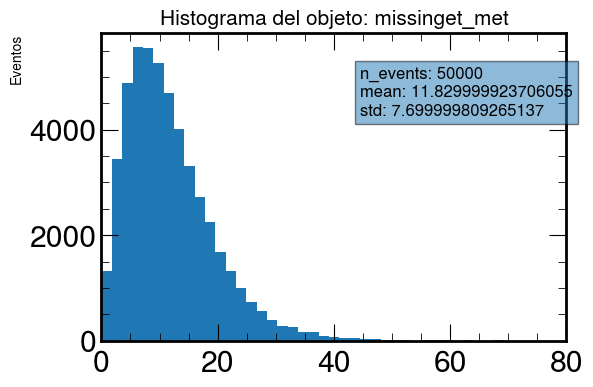

In [23]:
plt.figure(figsize=(6,4))
pt_jet(data,'missinget_met',0,80,100)

In [35]:
data_bjet.to_csv("data_bjet_M50.csv",index=None)

# Eficiencia de corte

In [237]:
b0 = []
b1 = []
j0 = []
j1 = []
for i in range(len(data2)):
    b0_temp = data_before_c1.iloc[i][4]
    b1_temp = data_before_c1.iloc[i][5]
    j0_temp = data2.iloc[i][9]
    j1_temp = data2.iloc[i][10]
    
    b0.append(b0_temp)
    b1.append(b1_temp)
    j0.append(j0_temp)
    j1.append(j1_temp)

In [241]:
def eff_corte(before,after):
    return len(after)/len(before)

def pross(n_pros,b0,b1,j0,j1):
    pross = []
    if n_pros == 1:
        for i in range(len(data2)):
            if b0[i] != j0[i]:
                pross.append([b0[i],j0[i]]) # b0_j0
            else: pross.append(0)
    if n_pros == 2:
        for i in range(len(data2)):
            if b1[i] != j0[i]:
                pross.append([b1[i],j0[i]]) # b1_j0
            else: pross.append(0)
    if n_pros == 3:
        for i in range(len(data2)):
            if b0[i] != j1[i]:
                pross.append([b0[i],j1[i]]) # b0_j1
            else: pross.append(0)
    if n_pros == 4:
        for i in range(len(data2)):
            if b1[i] != j1[i]:
                pross.append([b1[i],j1[i]])
            else: pross.append(0)
    return pross

In [247]:
pross1 = pross(1,b0,b1,j0,j1)
pross2 = pross(2,b0,b1,j0,j1)
pross3 = pross(3,b0,b1,j0,j1)
pross4 = pross(4,b0,b1,j0,j1)

In [344]:
data_before_c1 = data_bjet
data_before_c1["pross1"] = pross1
data_before_c1["pross2"] = pross2
data_before_c1["pross3"] = pross3
data_before_c1["pross4"] = pross4
data_before_c1["met"] = data_filtered.missinget_phi.tolist()

data_before_c1["jet_phi0"] = data2.jet_phi0.tolist()
data_before_c1["jet_phi1"] = data2.jet_phi1.tolist()
data_before_c1["jet_phi2"] = data2.jet_phi2.tolist()
data_before_c1["jet_phi3"] = data2.jet_phi3.tolist()
data_before_c1.head()


,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,...,inv_mass_b_eta,pross1,pross2,pross3,pross4,jet_phi0,jet_phi1,jet_phi2,jet_phi3,met
0,36.520973,30.758999,0.409347,1.242087,1.015780,2.322117,3.420154,4.004740,0.832740,1.306336,...,49.844759,0,"[2.3221166133880615, 1.0157804489135742]","[1.0157804489135742, 2.3221166133880615]",0,1.015780,2.322117,-1.991271,-0.625506,1.564066
1,30.415281,14.244907,-0.723814,-1.353978,-2.900409,-0.205079,6.192515,3.142711,-0.630164,2.695330,...,42.731848,0,"[-0.20507898926734924, -2.900409460067749]","[-2.900409460067749, -0.20507898926734924]",0,-2.900409,-0.205079,0.500581,-1.536333,0.757718
2,38.492733,17.479437,1.769234,2.213748,3.118397,-1.915401,5.367582,3.574377,0.444513,1.249388,...,32.491735,0,"[-1.915400743484497, 3.1183969974517822]","[3.1183969974517822, 0.5608179569244385]","[-1.915400743484497, 0.5608179569244385]",3.118397,0.560818,-1.915401,-0.167770,-2.244226
3,19.937721,15.938089,-0.101928,0.890768,-3.104975,1.443351,3.958317,1.914171,0.992696,1.734860,...,32.849040,"[-3.1049745082855225, -0.8830508589744568]","[1.4433506727218628, -0.8830508589744568]",0,"[1.4433506727218628, -3.1049745082855225]",-0.883051,-3.104975,-0.536545,1.443351,0.950740
4,29.754230,11.970448,-0.044334,-1.366111,-2.396115,0.740930,5.236414,2.407120,-1.321776,3.137044,...,46.292366,0,"[0.7409295439720154, -2.3961148262023926]","[-2.3961148262023926, -0.5012230277061462]","[0.7409295439720154, -0.5012230277061462]",-2.396115,-0.501223,0.740930,1.311700,1.985356


## Primer corte: $N_{b} = 2$, $P_{T}(b)>5$, $|\eta(b)| < 2.5$
los $N_{b} = 2$ son los eventos que se consideraron con 2 jets, estos se realizo en el anterior análisis. 

In [345]:
data_after_c1 = data_bjet[(data_bjet.jet_pt_b1 > 5) & (data_bjet.jet_pt_b2 > 5) & (abs(data_bjet.jet_eta_b1) < 2.5) & (abs(data_bjet.jet_eta_b2) < 2.5)]
data_after_c1.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,...,inv_mass_b_eta,pross1,pross2,pross3,pross4,jet_phi0,jet_phi1,jet_phi2,jet_phi3,met
0,36.520973,30.758999,0.409347,1.242087,1.015780,2.322117,3.420154,4.004740,0.832740,1.306336,...,49.844759,0,"[2.3221166133880615, 1.0157804489135742]","[1.0157804489135742, 2.3221166133880615]",0,1.015780,2.322117,-1.991271,-0.625506,1.564066
1,30.415281,14.244907,-0.723814,-1.353978,-2.900409,-0.205079,6.192515,3.142711,-0.630164,2.695330,...,42.731848,0,"[-0.20507898926734924, -2.900409460067749]","[-2.900409460067749, -0.20507898926734924]",0,-2.900409,-0.205079,0.500581,-1.536333,0.757718
2,38.492733,17.479437,1.769234,2.213748,3.118397,-1.915401,5.367582,3.574377,0.444513,1.249388,...,32.491735,0,"[-1.915400743484497, 3.1183969974517822]","[3.1183969974517822, 0.5608179569244385]","[-1.915400743484497, 0.5608179569244385]",3.118397,0.560818,-1.915401,-0.167770,-2.244226
3,19.937721,15.938089,-0.101928,0.890768,-3.104975,1.443351,3.958317,1.914171,0.992696,1.734860,...,32.849040,"[-3.1049745082855225, -0.8830508589744568]","[1.4433506727218628, -0.8830508589744568]",0,"[1.4433506727218628, -3.1049745082855225]",-0.883051,-3.104975,-0.536545,1.443351,0.950740
4,29.754230,11.970448,-0.044334,-1.366111,-2.396115,0.740930,5.236414,2.407120,-1.321776,3.137044,...,46.292366,0,"[0.7409295439720154, -2.3961148262023926]","[-2.3961148262023926, -0.5012230277061462]","[0.7409295439720154, -0.5012230277061462]",-2.396115,-0.501223,0.740930,1.311700,1.985356


In [346]:
print("La eficiencia para el primer corte es:", eff_corte(data_before_c1,data_after_c1))

La eficiencia para el primer corte es: 0.9667950591047948


## Segundo corte: $\Delta R(b_{1},b_{2}) < 3.5$

In [347]:
data_before_c2 = data_after_c1

In [348]:
data_after_c2 = data_before_c2[(data_before_c2.DeltaR_b < 3.5)]
data_after_c2.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,...,inv_mass_b_eta,pross1,pross2,pross3,pross4,jet_phi0,jet_phi1,jet_phi2,jet_phi3,met
0,36.520973,30.758999,0.409347,1.242087,1.015780,2.322117,3.420154,4.004740,0.832740,1.306336,...,49.844759,0,"[2.3221166133880615, 1.0157804489135742]","[1.0157804489135742, 2.3221166133880615]",0,1.015780,2.322117,-1.991271,-0.625506,1.564066
1,30.415281,14.244907,-0.723814,-1.353978,-2.900409,-0.205079,6.192515,3.142711,-0.630164,2.695330,...,42.731848,0,"[-0.20507898926734924, -2.900409460067749]","[-2.900409460067749, -0.20507898926734924]",0,-2.900409,-0.205079,0.500581,-1.536333,0.757718
2,38.492733,17.479437,1.769234,2.213748,3.118397,-1.915401,5.367582,3.574377,0.444513,1.249388,...,32.491735,0,"[-1.915400743484497, 3.1183969974517822]","[3.1183969974517822, 0.5608179569244385]","[-1.915400743484497, 0.5608179569244385]",3.118397,0.560818,-1.915401,-0.167770,-2.244226
3,19.937721,15.938089,-0.101928,0.890768,-3.104975,1.443351,3.958317,1.914171,0.992696,1.734860,...,32.849040,"[-3.1049745082855225, -0.8830508589744568]","[1.4433506727218628, -0.8830508589744568]",0,"[1.4433506727218628, -3.1049745082855225]",-0.883051,-3.104975,-0.536545,1.443351,0.950740
4,29.754230,11.970448,-0.044334,-1.366111,-2.396115,0.740930,5.236414,2.407120,-1.321776,3.137044,...,46.292366,0,"[0.7409295439720154, -2.3961148262023926]","[-2.3961148262023926, -0.5012230277061462]","[0.7409295439720154, -0.5012230277061462]",-2.396115,-0.501223,0.740930,1.311700,1.985356


In [349]:
print("La eficiencia para el segundo corte es:", eff_corte(data_before_c2,data_after_c2))

La eficiencia para el segundo corte es: 0.9910702019508174


## Tercer corte: $m_{b1,b2} < 50$

In [350]:
data_before_c3 = data_after_c2

In [352]:
data_after_c3 = data_before_c3[(data_before_c3.inv_mass_b < 50) & (data_before_c3.inv_mass_b_eta < 50)].reset_index()
data_after_c3.drop("index",axis=1,inplace=True)
data_after_c3.head(10)

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,...,inv_mass_b_eta,pross1,pross2,pross3,pross4,jet_phi0,jet_phi1,jet_phi2,jet_phi3,met
0,36.520973,30.758999,0.409347,1.242087,1.015780,2.322117,3.420154,4.004740,0.832740,1.306336,...,49.844759,0,"[2.3221166133880615, 1.0157804489135742]","[1.0157804489135742, 2.3221166133880615]",0,1.015780,2.322117,-1.991271,-0.625506,1.564066
1,30.415281,14.244907,-0.723814,-1.353978,-2.900409,-0.205079,6.192515,3.142711,-0.630164,2.695330,...,42.731848,0,"[-0.20507898926734924, -2.900409460067749]","[-2.900409460067749, -0.20507898926734924]",0,-2.900409,-0.205079,0.500581,-1.536333,0.757718
2,38.492733,17.479437,1.769234,2.213748,3.118397,-1.915401,5.367582,3.574377,0.444513,1.249388,...,32.491735,0,"[-1.915400743484497, 3.1183969974517822]","[3.1183969974517822, 0.5608179569244385]","[-1.915400743484497, 0.5608179569244385]",3.118397,0.560818,-1.915401,-0.167770,-2.244226
3,19.937721,15.938089,-0.101928,0.890768,-3.104975,1.443351,3.958317,1.914171,0.992696,1.734860,...,32.849040,"[-3.1049745082855225, -0.8830508589744568]","[1.4433506727218628, -0.8830508589744568]",0,"[1.4433506727218628, -3.1049745082855225]",-0.883051,-3.104975,-0.536545,1.443351,0.950740
4,29.754230,11.970448,-0.044334,-1.366111,-2.396115,0.740930,5.236414,2.407120,-1.321776,3.137044,...,46.292366,0,"[0.7409295439720154, -2.3961148262023926]","[-2.3961148262023926, -0.5012230277061462]","[0.7409295439720154, -0.5012230277061462]",-2.396115,-0.501223,0.740930,1.311700,1.985356
5,15.483810,14.652706,0.438698,0.225251,1.196162,0.414254,3.331316,3.214178,-0.213447,0.781908,...,11.923130,0,"[0.4142535924911499, 1.1961616277694702]","[1.1961616277694702, 0.4142535924911499]",0,1.196162,0.414254,2.865352,0.113701,-0.502992
6,23.676588,12.458443,0.811117,0.360284,-2.499042,-0.146976,4.747000,1.279679,-0.450833,2.352066,...,32.655049,0,"[-0.14697624742984772, -2.499042272567749]","[-2.499042272567749, -0.14697624742984772]",0,-2.499042,-0.146976,0.898589,2.227299,0.805372
7,25.760820,17.245247,1.173554,0.960461,-0.912618,1.612475,3.463856,4.390210,-0.213093,2.525093,...,40.418922,0,"[1.6124752759933472, -0.9126180410385132]","[-0.9126180410385132, 1.6124752759933472]",0,-0.912618,1.612475,-0.299661,2.703484,0.639517
8,20.652901,11.655499,-2.131632,-2.309756,1.148903,-2.168387,2.277344,1.836173,-0.178124,2.965896,...,31.034264,0,"[-2.168386936187744, 1.1489027738571167]","[1.1489027738571167, -2.168386936187744]",0,1.148903,-2.168387,-0.536513,3.114288,-2.125879
9,27.316303,20.371902,0.372574,0.492392,-2.789164,0.467000,3.958912,3.587343,0.119818,3.027021,...,47.187310,0,"[0.4670003056526184, -2.789163589477539]","[-2.789163589477539, 0.4670003056526184]",0,-2.789164,0.467000,-0.405708,-1.953298,1.315794


In [353]:
print("La eficiencia para el tercer corte es:", eff_corte(data_before_c3,data_after_c3))

La eficiencia para el tercer corte es: 0.8598558358746881


# Cut Analysis

1. $| \Delta \phi(j0,j1)|$

2. $| \Delta \phi(j0,j2)|$

3. $| \Delta \phi(j0,j3)|$

4. $| \Delta \phi(j1,j2)|$

5. $| \Delta \phi(j1,j3)|$

6. $| \Delta \phi(j2,j3)|$

7. $| \Delta \phi(b0,b1)|$

8. $| \Delta \phi(b0,j0)|$ con b0 y j0 no siendo el mismo jet

9. $| \Delta \phi(b0,j1)|$ con b0 y j1 no siendo el mismo jet

10. $| \Delta \phi(b1,j0)|$ con b1 y j0 no siendo el mismo jet

11. $| \Delta \phi(b1,j1)|$ con b1 y j1 no siendo el mismo jet

In [354]:
dic_Dphi = {"j0_j1":[],"j0_j2":[],"j0_j3":[],"j1_j2":[],"j1_j3":[],"j2_j3":[],"b0_b1":[],"b0_j0":[],"b0_j1":[],"b1_j0":[],"b1_j1":[]}
df_Dphi = pd.DataFrame(dic_Dphi)
df_Dphi.head()

,j0_j1,j0_j2,j0_j3,j1_j2,j1_j3,j2_j3,b0_b1,b0_j0,b0_j1,b1_j0,b1_j1


In [355]:
phi_cor_1 = []
for i in range(len(data_after_c3)):
    phi_cor_1.append(AbsDeltaPhi(i,data_after_c3,"jet_phi0","jet_phi1")) # j0_j1

phi_cor_2 = []
for i in range(len(data_after_c3)):
    phi_cor_2.append(AbsDeltaPhi(i,data_after_c3,"jet_phi0","jet_phi2")) # j0_j2
    
phi_cor_3 = []
for i in range(len(data_after_c3)):
    phi_cor_3.append(AbsDeltaPhi(i,data_after_c3,"jet_phi0","jet_phi3")) # j0_j3

phi_cor_4 = []
for i in range(len(data_after_c3)):
    phi_cor_4.append(AbsDeltaPhi(i,data_after_c3,"jet_phi1","jet_phi2")) # j1_j2
    
phi_cor_5 = []
for i in range(len(data_after_c3)):
    phi_cor_5.append(AbsDeltaPhi(i,data_after_c3,"jet_phi1","jet_phi3")) # j1_j3
        
phi_cor_6 = []
for i in range(len(data_after_c3)):
    phi_cor_6.append(AbsDeltaPhi(i,data_after_c3,"jet_phi2","jet_phi3")) # j2_j3
    
phi_cor_7 = []
for i in range(len(data_after_c3)):
    phi_cor_7.append(AbsDeltaPhi(i,data_after_c3,"jet_phi_b1","jet_phi_b2")) # b0_b1

In [356]:
def DeltaPhi_2(d1,d2):
    dphi = d1 - d2
    if dphi >= np.pi:
        dphi -= 2*np.pi
    if dphi < -np.pi:
        dphi += 2*np.pi
    return dphi

def AbsDeltaPhi_2(d1,d2):
    return np.abs(DeltaPhi_2(d1,d2))    

In [361]:
phi_cor_8 = []
for i in range(len(data_after_c3)):
    if data_after_c3.pross1[i] == 0:
        phi_cor_8.append(np.nan)
    else:
        d_temp = data_after_c3.pross1[i]
        phi_cor_8.append(AbsDeltaPhi_2(d_temp[0],d_temp[1])) # b0_j0
        
phi_cor_9 = []
for i in range(len(data_after_c3)):
    if data_after_c3.pross2[i] == 0:
        phi_cor_9.append(np.nan)
    else:
        d_temp = data_after_c3.pross2[i]
        phi_cor_9.append(AbsDeltaPhi_2(d_temp[0],d_temp[1])) # b1_j0
        
phi_cor_10 = []
for i in range(len(data_after_c3)):
    if data_after_c3.pross3[i] == 0:
        phi_cor_10.append(np.nan)
    else:
        d_temp = data_after_c3.pross3[i]
        phi_cor_10.append(AbsDeltaPhi_2(d_temp[0],d_temp[1])) # b0_j1
        
phi_cor_11 = []
for i in range(len(data_after_c3)):
    if data_after_c3.pross4[i] == 0:
        phi_cor_11.append(np.nan)
    else:
        d_temp = data_after_c3.pross4[i]
        phi_cor_11.append(AbsDeltaPhi_2(d_temp[0],d_temp[1])) # b1_j1
        
phi_cor_12 = []
for i in range(len(data_after_c3)):
    phi_cor_12.append(AbsDeltaPhi(i,data_after_c3,"met","jet_phi0")) # metPhi_j0
    
phi_cor_13 = []
for i in range(len(data_after_c3)):
    phi_cor_13.append(AbsDeltaPhi(i,data_after_c3,"met","jet_phi1")) # metPhi_j1
    
phi_cor_14 = []
for i in range(len(data_after_c3)):
    phi_cor_14.append(AbsDeltaPhi(i,data_after_c3,"met","jet_phi2")) # metPhi_j2
    
phi_cor_15 = []
for i in range(len(data_after_c3)):
    phi_cor_15.append(AbsDeltaPhi(i,data_after_c3,"met","jet_phi3")) # metPhi_j3

In [362]:
df_Dphi["j0_j1"] = phi_cor_1
df_Dphi["j0_j2"] = phi_cor_2
df_Dphi["j0_j3"] = phi_cor_3
df_Dphi["j1_j2"] = phi_cor_4
df_Dphi["j1_j3"] = phi_cor_5
df_Dphi["j2_j3"] = phi_cor_6
df_Dphi["b0_b1"] = phi_cor_7
df_Dphi["b0_j0"] = phi_cor_8
df_Dphi["b0_j1"] = phi_cor_10
df_Dphi["b1_j0"] = phi_cor_9
df_Dphi["b1_j1"] = phi_cor_11
df_Dphi["metphi_j0"] = phi_cor_12
df_Dphi["metphi_j1"] = phi_cor_13
df_Dphi["metphi_j2"] = phi_cor_14
df_Dphi["metphi_j3"] = phi_cor_15

In [363]:
df_Dphi.head()

,j0_j1,j0_j2,j0_j3,j1_j2,j1_j3,j2_j3,b0_b1,b0_j0,b0_j1,b1_j0,b1_j1,metphi_j0,metphi_j1,metphi_j2,metphi_j3
0,1.306336,3.007051,1.641287,1.969798,2.947623,1.365764,1.306336,NaN,1.306336,1.306336,NaN,0.548285,0.758051,2.727849,2.189572
1,2.695330,2.882195,1.364076,0.705660,1.331254,2.036914,2.695330,NaN,2.695330,2.695330,NaN,2.625057,0.962797,0.257138,2.294052
2,2.557579,1.249388,2.997019,2.476219,0.728587,1.747631,1.249388,NaN,2.557579,1.249388,2.476219,0.920562,2.805044,0.328825,2.076457
3,2.221924,0.346506,2.326402,2.568430,1.734860,1.979895,1.734860,2.221924,NaN,2.326402,1.734860,1.833791,2.227471,1.487285,0.492611
4,1.894892,3.137044,2.575371,1.242153,1.812923,0.570770,3.137044,NaN,1.894892,3.137044,1.242153,1.901714,2.486579,1.244427,0.673657


# Histogramas del Analisis de $\Delta \phi$ dados los cortes

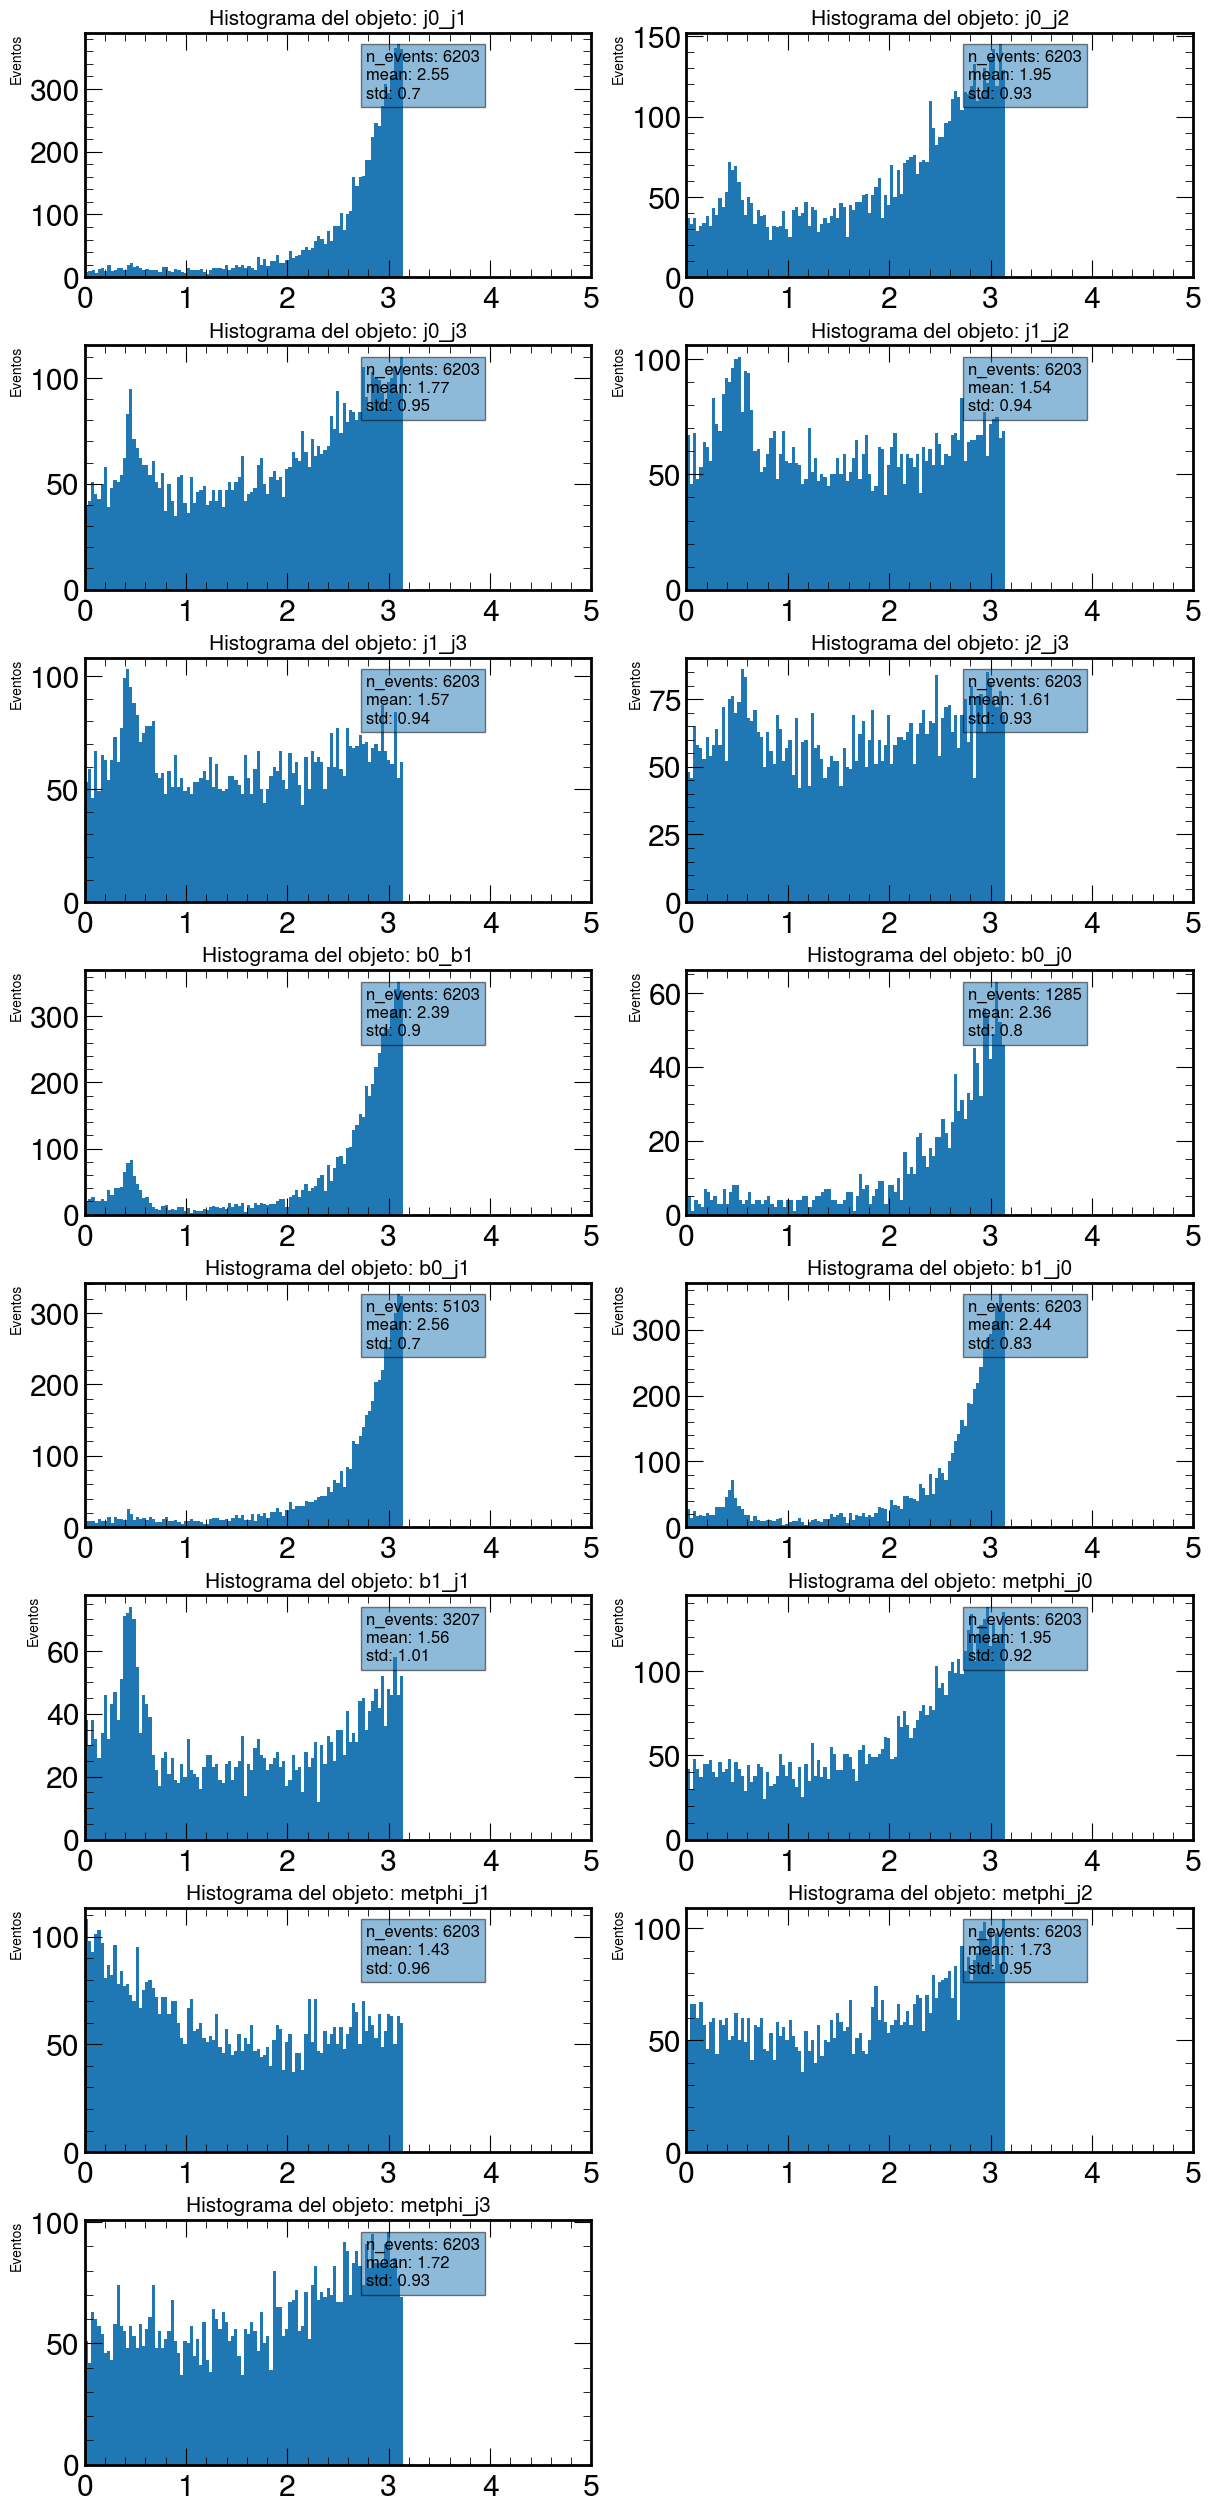

In [365]:
plt.figure(figsize=(12,25),constrained_layout=True)

plt.subplot(8,2,1)
pt_jet(df_Dphi,'j0_j1',0,5,100)
plt.subplot(8,2,2)
pt_jet(df_Dphi,'j0_j2',0,5,100)
plt.subplot(8,2,3)
pt_jet(df_Dphi,'j0_j3',0,5,100)
plt.subplot(8,2,4)
pt_jet(df_Dphi,'j1_j2',0,5,100)
plt.subplot(8,2,5)
pt_jet(df_Dphi,'j1_j3',0,5,100)
plt.subplot(8,2,6)
pt_jet(df_Dphi,'j2_j3',0,5,100)
plt.subplot(8,2,7)
pt_jet(df_Dphi,'b0_b1',0,5,100)
plt.subplot(8,2,8)
pt_jet(df_Dphi,'b0_j0',0,5,100)
plt.subplot(8,2,9)
pt_jet(df_Dphi,'b0_j1',0,5,100)
plt.subplot(8,2,10)
pt_jet(df_Dphi,'b1_j0',0,5,100)
plt.subplot(8,2,11)
pt_jet(df_Dphi,'b1_j1',0,5,100)
plt.subplot(8,2,12)
pt_jet(df_Dphi,'metphi_j0',0,5,100)
plt.subplot(8,2,13)
pt_jet(df_Dphi,'metphi_j1',0,5,100)
plt.subplot(8,2,14)
pt_jet(df_Dphi,'metphi_j2',0,5,100)
plt.subplot(8,2,15)
pt_jet(df_Dphi,'metphi_j3',0,5,100)

# Estadisticas descriptivas de tabla de valores de $\Delta \phi$

In [369]:
df_Dphi.describe()

,j0_j1,j0_j2,j0_j3,j1_j2,j1_j3,j2_j3,b0_b1,b0_j0,b0_j1,b1_j0,b1_j1,metphi_j0,metphi_j1,metphi_j2,metphi_j3
count,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,1285.000000,5103.000000,6203.000000,3207.000000,6203.000000,6203.000000,6203.000000,6203.000000
mean,2.546169,1.953502,1.766570,1.539394,1.570926,1.612741,2.389941,2.360533,2.557327,2.439142,1.561066,1.947506,1.426091,1.725037,1.719288
std,0.698090,0.929183,0.948094,0.943174,0.937342,0.929989,0.897645,0.798212,0.703534,0.834680,1.008270,0.921033,0.956986,0.947574,0.929588
min,0.005579,0.000354,0.000586,0.000857,0.000578,0.000470,0.003194,0.015764,0.005486,0.000354,0.000685,0.001008,0.000202,0.002023,0.000177
25%,2.399016,1.189288,0.893801,0.642862,0.678837,0.760636,2.244098,2.107067,2.435249,2.296756,0.536969,1.230607,0.558565,0.888407,0.886436
50%,2.812970,2.220338,1.910245,1.512552,1.576768,1.648989,2.783366,2.659645,2.826561,2.787050,1.548682,2.186306,1.316582,1.838025,1.831535
75%,3.000282,2.752403,2.626323,2.400720,2.430303,2.448679,2.992381,2.944482,3.009610,2.991198,2.543556,2.750697,2.286002,2.582756,2.558424
max,3.141550,3.141545,3.141154,3.141159,3.141460,3.141463,3.141550,3.139204,3.141550,3.141550,3.140806,3.141551,3.140788,3.141558,3.141006
